# Addition

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `Add`
An n-bit addition gate.

Implements $U|a\rangle|b\rangle \rightarrow |a\rangle|a+b\rangle$ using $4n - 4 T$ gates.

#### Parameters
 - `a_dtype`: Quantum datatype used to represent the integer a.
 - `b_dtype`: Quantum datatype used to represent the integer b. Must be large enough to hold the result in the output register of a + b, or else it simply drops the most significant bits. If not specified, b_dtype is set to a_dtype. 

#### Registers
 - `a`: A a_dtype.bitsize-sized input register (register a above).
 - `b`: A b_dtype.bitsize-sized input/output register (register b above). 

#### References
 - [Halving the cost of quantum addition](https://arxiv.org/abs/1709.06648). 


In [2]:
from qualtran.bloqs.arithmetic import Add

### Example Instances

In [3]:
n = sympy.Symbol('n')
add_symb = Add(QInt(bitsize=n))

In [4]:
add_small = Add(QUInt(bitsize=4))

In [5]:
add_large = Add(QUInt(bitsize=64))

In [6]:
add_diff_size_regs = Add(QUInt(bitsize=4), QUInt(bitsize=16))

#### Graphical Signature

In [7]:
from qualtran.drawing import show_bloqs
show_bloqs([add_symb, add_small, add_large, add_diff_size_regs],
           ['`add_symb`', '`add_small`', '`add_large`', '`add_diff_size_regs`'])

### Call Graph

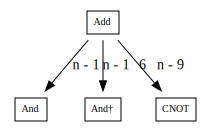

#### Counts totals:
 - `And`: $\displaystyle n - 1$
 - `And†`: $\displaystyle n - 1$
 - `CNOT`: $\displaystyle 6 n - 9$

In [8]:
from qualtran.resource_counting.generalizers import ignore_split_join
add_symb_g, add_symb_sigma = add_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(add_symb_g)
show_counts_sigma(add_symb_sigma)

## `OutOfPlaceAdder`
An n-bit addition gate.

Implements $U|a\rangle|b\rangle 0\rangle \rightarrow |a\rangle|b\rangle|a+b\rangle$
using $4n - 4 T$ gates. Uncomputation requires 0 T-gates.

#### Parameters
 - `bitsize`: Number of bits used to represent each input integer. The allocated output register is of size `bitsize+1` so it has enough space to hold the sum of `a+b`.
 - `is_adjoint`: Whether this is compute or uncompute version.
 - `include_most_significant_bit`: Whether to add an extra most significant (i.e. carry) bit. 

#### Registers
 - `a`: A bitsize-sized input register (register a above).
 - `b`: A bitsize-sized input register (register b above).
 - `c`: The LEFT/RIGHT register depending on whether the gate adjoint or not. This register size is either bitsize or bitsize+1 depending on the value of `include_most_significant_bit`. 

#### References
 - [Halving the cost of quantum addition](https://arxiv.org/abs/1709.06648). 


In [9]:
from qualtran.bloqs.arithmetic import OutOfPlaceAdder

### Example Instances

In [10]:
n = sympy.Symbol('n')
add_oop_symb = OutOfPlaceAdder(bitsize=n)

In [11]:
add_oop_small = OutOfPlaceAdder(bitsize=4)

In [12]:
add_oop_large = OutOfPlaceAdder(bitsize=64)

#### Graphical Signature

In [13]:
from qualtran.drawing import show_bloqs
show_bloqs([add_oop_symb, add_oop_small, add_oop_large],
           ['`add_oop_symb`', '`add_oop_small`', '`add_oop_large`'])

### Call Graph

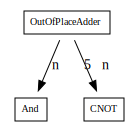

#### Counts totals:
 - `And`: $\displaystyle n$
 - `CNOT`: $\displaystyle 5 n$

In [14]:
from qualtran.resource_counting.generalizers import ignore_split_join
add_oop_symb_g, add_oop_symb_sigma = add_oop_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(add_oop_symb_g)
show_counts_sigma(add_oop_symb_sigma)

## `AddK`
Takes |x> to |x + k> for a classical integer `k`.

This construction simply XORs the classical constant into a quantum register and
applies quantum-quantum addition. This is the lowest T-count algorithm at the expense
of $n$ auxiliary qubits. This construction also permits an inexpensive controlled version:
you only need to control the loading of the classical constant which can be done with
only clifford operations.

#### Parameters
 - `dtype`: data type of the input register `x`
 - `k`: The classical integer value to be added to x.
 - `is_controlled`: if True, construct a singly-controlled bloq. 

#### Registers
 - `x`: register of type `self.dtype` 

#### References
 - [Improved quantum circuits for elliptic curve discrete logarithms](https://arxiv.org/abs/2001.09580). Haner et al. 2020. Section 3: Components. "Integer addition" and Fig 2a.


In [15]:
from qualtran.bloqs.arithmetic import AddK

### Example Instances

In [16]:
n, k = sympy.symbols('n k')
add_k = AddK(QUInt(n), k=k)

In [17]:
add_k_small = AddK(QUInt(4), k=2)

In [18]:
add_k_large = AddK(QInt(64), k=-23)

#### Graphical Signature

In [19]:
from qualtran.drawing import show_bloqs
show_bloqs([add_k, add_k_small, add_k_large],
           ['`add_k`', '`add_k_small`', '`add_k_large`'])

### Call Graph

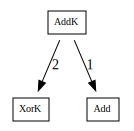

#### Counts totals:
 - `Add`: 1
 - `XorK`: 2

In [20]:
from qualtran.resource_counting.generalizers import ignore_split_join
add_k_g, add_k_sigma = add_k.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(add_k_g)
show_counts_sigma(add_k_sigma)